## Descarga y formatting del CSV de los datos

In [ ]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-02-28 17:34:02--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [ <=>                ]  52.85M  4.59MB/s    in 12s     

2024-02-28 17:34:15 (4.44 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [ ]:
import cv2
import numpy
import pandas
import imageio.v3 as io
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from tqdm import tqdm
from typing import Optional, Union

In [ ]:
data = pandas.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16536728,https://www.airbnb.com/rooms/16536728,20170407214119,2017-04-08,Ático en el Barrio de Salamanca,Precioso ático en el barrio de Salamanca. Dos...,NaN,Precioso ático en el barrio de Salamanca. Dos...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.43007580267911,-3.674373225929859","Host Has Profile Pic,Is Location Exact,Require..."
1,14800288,https://www.airbnb.com/rooms/14800288,20170407214119,2017-04-08,"Salamanca Comfort XI, Friendly Rentals","Lugares de interés: Fide, Bienmesabe, Restaura...",Apartamento de nueva construcción (julio 2016)...,Apartamento de nueva construcción (julio 2016)...,none,"Localizado en el distrito de Salamanca, uno de...",...,8.0,10.0,9.0,NaN,NaN,strict,145,0.79,"40.43561324649597,-3.678321445006713","Host Has Profile Pic,Is Location Exact,Require..."
2,12357427,https://www.airbnb.com/rooms/12357427,20170407214119,2017-04-08,Apt. by the music Conservatory!!,Very bright apartment with 2 bedrooms 1 with p...,NaN,Very bright apartment with 2 bedrooms 1 with p...,none,NaN,...,8.0,8.0,8.0,NaN,NaN,flexible,1,0.43,"40.446440723481764,-3.6742595345116214","Host Has Profile Pic,Host Identity Verified,Is..."
3,7984552,https://www.airbnb.com/rooms/7984552,20170407214119,2017-04-08,Double Room near RealMadrid Stadium,The flat is on the ground floor. There's a com...,Cosy large room for two people with a flat TV ...,The flat is on the ground floor. There's a com...,none,Chamartín is an administrative district of Mad...,...,NaN,NaN,NaN,NaN,NaN,moderate,2,NaN,"40.455167347211834,-3.698099022915008","Host Is Superhost,Host Has Profile Pic,Is Loca..."
4,17244421,https://www.airbnb.com/rooms/17244421,20170407214119,2017-04-08,Mid Century Flat,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43988285945364,-3.71737227282086","Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,12185821,https://www.airbnb.com/rooms/12185821,20170407214119,2017-04-08,Apartamento completo una habitación,Hola! Nuestro apartamento es un lugar acogedor...,"Muy acogedor, y tenemos un ventanal que da a l...",Hola! Nuestro apartamento es un lugar acogedor...,none,Es una zona muy céntrica donde tomarte unas ca...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.397772302001854,-3.6945501615175997","Host Has Profile Pic,Host Identity Verified,Is..."
13997,799569,https://www.airbnb.com/rooms/799569,20170407214119,2017-04-08,"PENTHOUSE/TERRACE, THE CITY CENTER",A charming and beautiful 2 independents bedroo...,A charming and beautiful 2 bedroom attic The a...,A charming and beautiful 2 independents bedroo...,none,Malasaña is considered the Bohemian district M...,...,10.0,10.0,9.0,NaN,NaN,strict,2,2.40,"40.42579998148187,-3.7040803907189943","Host Has Profile Pic,Is Location Exact,Require..."
13998,15542212,https://www.airbnb.com/rooms/15542212,20170407214119,2017-04-08,Cozy & Centric 1BD - Conde Duque,Calm and confortable apartment. Totally renewe...,Calm and confortable apartment. Totally renewe...,Calm and confortable apartment. Totally renewe...,none,Conde Duque is a dynamic and central neighborh...,...,10.0,10.0,9.0,NaN,NaN,flexible,1,0.94,"40.42616571464884,-3.7077944204488813","Host Has Profile Pic,Host Identity Verified,Is..."
13999,14725727,https://www.airbnb.com/rooms/14725727,20170407214119,2017-04-08,Room near Madrid downtown,"Highlight Places: Plaza España, Conde Duque Cu...",It is well located for access to central touri...,"Highlight Places: Plaza España, Conde Duque Cu...",none,"The neighborhood has many shops (Zara, El Cort...",

Se revisan las variables.

In [ ]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Unicamente se quiere la información de Madrid, se revisan los valores únicos de 'City'.

In [ ]:
unique_city = data['City'].unique()
print("Valores únicos en la columna 'City':", unique_city)

Valores únicos en la columna 'City': ['Madrid' 'Barcelona' 'Pollença' 'Sa Colònia' 'Palma' 'Selva' 'Muro'
 'Colònia de Sant Jordi' 'Torrenova' 'San Fernando de Henares' 'Felanitx'
 'Pozuelo' 'Deyá' 'Balearic Islands' 'Alcúdia' 'Valldemossa' 'Bunyola'
 'Manacor' 'Porto Cristo' 'Madrid, Comunidad de Madrid, ES' 'Can Pastilla'
 'Sóller' 'las matas  madrid' 'Sa Pobla' 'Sineu' 'Illes Balears'
 'Font de Sa Cala' 'Motilla del Palancar' 'Illetes'
 'Sant Llorenç des Cardassar' 'Deià' 'Costitx' 'Rotes Velles'
 'Santa Margalida' 'Pozuelo de Alarcón' 'madrid' 'Lloseta'
 'Mancor de la Vall' 'Vilafranca de Bonany' 'Pina, Mallorca' '马德里' 'Pina'
 'Santanyí' 'Inca' 'Aravaca' 'Hospitalet de Llobregat' 'Palma de Mallorca'
 'Madid' 'Binissalem-Mallorca DO' 'Can Picafort' 'Puerto ALCUDIA'
 'Madrid, Comunidad de Madrid, ESPANA' 'Llubí' 'Son Vida'
 'Comunidad de Madrid' 'Pollensa' 'Chiva' 'Sa Coma' 'Petra' 'Binissalem'
 'La Puebla' 'Búger' 'Aravaca (Madrid)' 'Malaga' 'Alaró' 'Campanet'
 'San Lázaro' 'Costa d

Se revisan los valores únicos de 'Market'

In [ ]:
unique_market = data['Market'].unique()
print("Valores únicos en la columna 'Market':", unique_market)

Valores únicos en la columna 'Market': ['Madrid' 'Barcelona' 'Mallorca Island' nan 'Other (International)'
 'London' 'Toledo' 'Deauville']


Al revisar 'City' la ciudad de Madrid que es con la que se va a trabajar a parece con varios errores. En el caso de 'Market', Madrid es correcto por lo que se crea un nuevo data frame en base a la columna de 'Market'.

In [ ]:
df_madrid= data.loc[data['Market'] == 'Madrid']
df_madrid.shape

(13263, 89)

Como se va a utilizar las imágenes de 'Thumbnail Url', se revisa cuantos NA hay y se eliminan.

In [ ]:
na_thumbnail_url = (df_madrid['Thumbnail Url'].isnull().sum() / len(df_madrid['Thumbnail Url'])) * 100
na_thumbnail_url = '{:.2f}%'.format(na_thumbnail_url)
na_thumbnail_url

'18.71%'

In [ ]:
df_madrid = df_madrid.dropna(subset=['Thumbnail Url'])
na_thumbnail_url = (df_madrid['Thumbnail Url'].isnull().sum() / len(df_madrid['Thumbnail Url'])) * 100
na_thumbnail_url = '{:.2f}%'.format(na_thumbnail_url)
na_thumbnail_url


'0.00%'

In [ ]:
df_madrid.shape

(10782, 89)

In [ ]:
df_madrid.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Se eliminan aquellas variables que no son relevantes para el estudio.
- ID
- Listing Url
- Scrape ID
- Last Scraped
- Name
- Summary
- Space
- Description
- Experiences Offered
- Neighborhood Overview
- Notes
- Transit
- Access
- Interaction
- House Rules
- Medium Url
- Picture Url
- XL Picture Url
- Host ID
- Host URL
- Host Name
- Host Since
- Host Location
- Host About
- Host Response Time
- Host Response Rate
- Host Acceptance Rate
- Host Thumbnail Url
- Host Picture Url
- Host Neighbourhood
- Host Listings Count
- Host Verifications
- Street
- Neighbourhood
- Neighbourhood Cleansed
- City
- State
- Zipcode
- Market
- Smart Location
- Country Code
- Country
- Latitude
- Longitude
- Weekly Price
- Monthly Price
- Extra People
- Calendar Updated
- Has Availability
- Calendar last Scraped
- First Review
- Last Review
- Review Scores Accuracy
- Review Scores Cleanliness
- Review Scores Checkin'
- Review Scores Communication
- Review Scores Location
- Review Scores Value
- License
- Jurisdiction Names
- Calculated host listings count
- Reviews per Month
- Geolocation
- Features

In [ ]:
df_madrid = df_madrid.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Weekly Price', 'Monthly Price', 'Extra People', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features'], axis=1)
df_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,10779.0,8.525281,24.607967,0.0,1.0,2.0,5.0,265.0
Accommodates,10782.0,3.061770,1.967099,1.0,2.0,2.0,4.0,16.0
Bathrooms,10746.0,1.253024,0.608458,0.0,1.0,1.0,1.0,8.0
Bedrooms,10761.0,1.276647,0.798199,0.0,1.0,1.0,1.0,10.0
Beds,10744.0,1.929449,1.498472,1.0,1.0,1.0,2.0,16.0
Square Feet,375.0,344.677333,483.004639,0.0,0.0,85.0,624.0,2691.0
Price,10782.0,63.432387,59.977428,9.0,30.0,50.0,75.0,850.0
Security Deposit,4428.0,178.793586,103.226086,70.0,100.0,150.0,200.0,950.0
Cleaning Fee,6298.0,27.359162,19.738611,4.0,15.0,25.0,32.0,250.0
Guests Included,10782.0,1.548971,1.083117,1.0,1.0,1.0,2.0,16.0


In [ ]:
df_madrid.shape

(10782, 25)

df_madrid se guarda en un .csv

In [ ]:
df_madrid.to_csv('df_madrid.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp df_madrid.csv /content/drive/MyDrive/df_madrid.csv

In [ ]:
df_madrid = pandas.read_csv("/content/drive/MyDrive/df_madrid.csv", sep=';')

In [ ]:
df_madrid.shape

(10782, 25)

In [ ]:
df_madrid.columns

Index(['Thumbnail Url', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Cancellation Policy'],
      dtype='object')

## División entre train, validation y test.

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_madrid, test_size=0.25, shuffle=True, random_state=0)
df_train, df_validation = train_test_split(df_madrid, test_size=0.1, shuffle=True, random_state=0)
print("Muestras de train: {}".format(df_train.shape[0]))
print("Muestras de test: {}".format(df_test.shape[0]))
print("Muestras de validación: {}".format(df_validation.shape[0]))

df_test.to_csv('./df_test.csv', sep=';', decimal='.', index=False)
df_validation.to_csv('./df_validation.csv', sep=';', decimal='.', index=False)




Muestras de train: 9703
Muestras de test: 2696
Muestras de validación: 1079


## Exploración de datos (EDA)

Revisión de NA.

In [ ]:
na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train = na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Thumbnail Url                    0.00%
Host Total Listings Count        0.03%
Neighbourhood Group Cleansed     0.01%
Property Type                    0.00%
Room Type                        0.00%
Accommodates                     0.00%
Bathrooms                        0.33%
Bedrooms                         0.22%
Beds                             0.36%
Bed Type                         0.00%
Amenities                        1.14%
Square Feet                     96.56%
Price                            0.00%
Security Deposit                58.62%
Cleaning Fee                    41.47%
Guests Included                  0.00%
Minimum Nights                   0.00%
Maximum Nights                   0.00%
Availability 30                  0.00%
Availability 60                  0.00%
Availability 90                  0.00%
Availability 365                 0.00%
Number of Reviews                0.00%
Review Scores Rating            20.96%
Cancellation Policy              0.00%
dtype: object

Square Feet (96,61%), Security Deposit (59,23%) tienen un porcentaje alto de NA, eliminamos esas dos columnas. Se elimina la columna 'Thumbnail Url' ya que no va a hacer falta.

In [ ]:
df_train = df_train.drop(columns=['Square Feet', 'Security Deposit'], axis=1)
column_names = df_train.columns
df_train.head().T

,6549,9136,7216,8180,7880
Thumbnail Url,https://a0.muscache.com/im/pictures/4cb5c0d5-c...,https://a0.muscache.com/im/pictures/3ba89074-0...,https://a0.muscache.com/im/pictures/50627152/d...,https://a0.muscache.com/im/pictures/bdadeaa7-7...,https://a0.muscache.com/im/pictures/c0d23e55-6...
Host Total Listings Count,40.0,6.0,9.0,39.0,1.0
Neighbourhood Group Cleansed,Salamanca,Centro,Centro,Chamartín,Centro
Property Type,Apartment,Condominium,House,Apartment,Apartment
Room Type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,4,2,4,8,4
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,2.0,1.0,2.0,3.0,1.0
Beds,3.0,1.0,2.0,4.0,2.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed


Se revisa el porcentaje de NA.

In [ ]:
na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train = na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Thumbnail Url                    0.00%
Host Total Listings Count        0.03%
Neighbourhood Group Cleansed     0.01%
Property Type                    0.00%
Room Type                        0.00%
Accommodates                     0.00%
Bathrooms                        0.33%
Bedrooms                         0.22%
Beds                             0.36%
Bed Type                         0.00%
Amenities                        1.14%
Price                            0.00%
Cleaning Fee                    41.47%
Guests Included                  0.00%
Minimum Nights                   0.00%
Maximum Nights                   0.00%
Availability 30                  0.00%
Availability 60                  0.00%
Availability 90                  0.00%
Availability 365                 0.00%
Number of Reviews                0.00%
Review Scores Rating            20.96%
Cancellation Policy              0.00%
dtype: object

En la variable 'Cleaning Fee' y 'Review Scores Rating' calculamos la media con respecto al precio para rellenar los NA

In [ ]:
cleaning_fee_mean = df_train['Cleaning Fee'].mean()
df_train['Cleaning Fee'].fillna(cleaning_fee_mean, inplace=True)

Review_Scores_Rating_mean = df_train['Review Scores Rating'].mean()
df_train['Review Scores Rating'].fillna(cleaning_fee_mean, inplace=True)

Del resto de columnas se eliminan los valores NA y renombramos la columna 'Neighbourhood Group Cleansed'

In [ ]:
df_train = df_train.dropna(subset=['Host Total Listings Count', 'Neighbourhood Group Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities'])
df_train = df_train.rename(columns={'Neighbourhood Group Cleansed': 'Neighbourhood'})

na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train = na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Thumbnail Url                0.00%
Host Total Listings Count    0.00%
Neighbourhood                0.00%
Property Type                0.00%
Room Type                    0.00%
Accommodates                 0.00%
Bathrooms                    0.00%
Bedrooms                     0.00%
Beds                         0.00%
Bed Type                     0.00%
Amenities                    0.00%
Price                        0.00%
Cleaning Fee                 0.00%
Guests Included              0.00%
Minimum Nights               0.00%
Maximum Nights               0.00%
Availability 30              0.00%
Availability 60              0.00%
Availability 90              0.00%
Availability 365             0.00%
Number of Reviews            0.00%
Review Scores Rating         0.00%
Cancellation Policy          0.00%
dtype: object

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9539 entries, 6549 to 2732
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Thumbnail Url              9539 non-null   object 
 1   Host Total Listings Count  9539 non-null   float64
 2   Neighbourhood              9539 non-null   object 
 3   Property Type              9539 non-null   object 
 4   Room Type                  9539 non-null   object 
 5   Accommodates               9539 non-null   int64  
 6   Bathrooms                  9539 non-null   float64
 7   Bedrooms                   9539 non-null   float64
 8   Beds                       9539 non-null   float64
 9   Bed Type                   9539 non-null   object 
 10  Amenities                  9539 non-null   object 
 11  Price                      9539 non-null   float64
 12  Cleaning Fee               9539 non-null   float64
 13  Guests Included            9539 non-null   in

Se transforman aquellos datos object en números enteros.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
columns_to_encode = ['Neighbourhood', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']
df_train[columns_to_encode] = encoder.fit_transform(df_train[columns_to_encode])


df_train.dtypes

Thumbnail Url                 object
Host Total Listings Count    float64
Neighbourhood                float64
Property Type                float64
Room Type                    float64
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Bed Type                     float64
Amenities                     object
Price                        float64
Cleaning Fee                 float64
Guests Included                int64
Minimum Nights                 int64
Maximum Nights                 int64
Availability 30                int64
Availability 60                int64
Availability 90                int64
Availability 365               int64
Number of Reviews              int64
Review Scores Rating         float64
Cancellation Policy          float64
dtype: object

'Amenities' puede ser relevante para el estudio por lo que se realiza el conteo en una nueva columna y eliminamos la original.

In [ ]:
df_train['Amenities'] = df_train['Amenities'].fillna('')
df_train['Amenities_Count'] = df_train['Amenities'].str.split(',').apply(len)
df_train = df_train.drop(['Amenities'], axis=1)

df_train.head().T

,6549,9136,7216,8180,7880
Thumbnail Url,https://a0.muscache.com/im/pictures/4cb5c0d5-c...,https://a0.muscache.com/im/pictures/3ba89074-0...,https://a0.muscache.com/im/pictures/50627152/d...,https://a0.muscache.com/im/pictures/bdadeaa7-7...,https://a0.muscache.com/im/pictures/c0d23e55-6...
Host Total Listings Count,40.0,6.0,9.0,39.0,1.0
Neighbourhood,14.0,3.0,3.0,4.0,3.0
Property Type,0.0,7.0,13.0,0.0,0.0
Room Type,0.0,1.0,0.0,0.0,0.0
Accommodates,4,2,4,8,4
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,2.0,1.0,2.0,3.0,1.0
Beds,3.0,1.0,2.0,4.0,2.0
Bed Type,4.0,4.0,4.0,4.0,4.0


In [ ]:
na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train= na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Thumbnail Url                0.00%
Host Total Listings Count    0.00%
Neighbourhood                0.00%
Property Type                0.00%
Room Type                    0.00%
Accommodates                 0.00%
Bathrooms                    0.00%
Bedrooms                     0.00%
Beds                         0.00%
Bed Type                     0.00%
Price                        0.00%
Cleaning Fee                 0.00%
Guests Included              0.00%
Minimum Nights               0.00%
Maximum Nights               0.00%
Availability 30              0.00%
Availability 60              0.00%
Availability 90              0.00%
Availability 365             0.00%
Number of Reviews            0.00%
Review Scores Rating         0.00%
Cancellation Policy          0.00%
Amenities_Count              0.00%
dtype: object

La variable 'Price' se colca al principio.

In [ ]:
columnas = df_train.columns.tolist()
columnas.insert(0, columnas.pop(columnas.index('Price')))
df_train = df_train[columnas]
print(df_train.columns)
df_train.dtypes

Index(['Price', 'Thumbnail Url', 'Host Total Listings Count', 'Neighbourhood',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Cleaning Fee', 'Guests Included', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Cancellation Policy', 'Amenities_Count'],
      dtype='object')


Price                        float64
Thumbnail Url                 object
Host Total Listings Count    float64
Neighbourhood                float64
Property Type                float64
Room Type                    float64
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Bed Type                     float64
Cleaning Fee                 float64
Guests Included                int64
Minimum Nights                 int64
Maximum Nights                 int64
Availability 30                int64
Availability 60                int64
Availability 90                int64
Availability 365               int64
Number of Reviews              int64
Review Scores Rating         float64
Cancellation Policy          float64
Amenities_Count                int64
dtype: object

int64 se convierte en float64

In [ ]:
df_train['Accommodates'] = df_train['Accommodates'].round().astype(float)
df_train['Guests Included'] = df_train['Guests Included'].round().astype(float)
df_train['Minimum Nights'] = df_train['Minimum Nights'].round().astype(float)
df_train['Maximum Nights'] = df_train['Maximum Nights'].round().astype(float)
df_train['Availability 30'] = df_train['Availability 30'].round().astype(float)
df_train['Availability 60'] = df_train['Availability 60'].round().astype(float)
df_train['Availability 90'] = df_train['Availability 90'].round().astype(float)
df_train['Availability 365'] = df_train['Availability 365'].round().astype(float)
df_train['Number of Reviews'] = df_train['Number of Reviews'].round().astype(float)
df_train['Amenities_Count'] = df_train['Amenities_Count'].round().astype(float)
df_train.dtypes

Price                        float64
Thumbnail Url                 object
Host Total Listings Count    float64
Neighbourhood                float64
Property Type                float64
Room Type                    float64
Accommodates                 float64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Bed Type                     float64
Cleaning Fee                 float64
Guests Included              float64
Minimum Nights               float64
Maximum Nights               float64
Availability 30              float64
Availability 60              float64
Availability 90              float64
Availability 365             float64
Number of Reviews            float64
Review Scores Rating         float64
Cancellation Policy          float64
Amenities_Count              float64
dtype: object

In [ ]:
df_train.shape

(9539, 23)

In [ ]:
df_train.describe()

,Price,Host Total Listings Count,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Amenities_Count
count,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,...,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.000000,9539.00000,9539.000000,9539.000000,9539.000000
mean,61.449313,8.624489,5.830695,1.962680,0.466611,3.079044,1.255373,1.282839,1.940769,3.973792,...,2.415767,990.191634,8.448894,22.487053,39.644722,201.720725,25.60478,79.075156,1.052312,14.543873
std,51.808955,24.693480,4.834866,4.558061,0.529494,1.976810,0.608866,0.802785,1.509303,0.197873,...,2.215935,10448.280497,8.723520,18.919373,28.554471,126.127874,40.57899,27.006672,0.833037,4.663924
min,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,0.000000,1.000000
25%,30.000000,1.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,365.000000,0.000000,5.000000,14.000000,80.000000,1.00000,80.000000,0.000000,11.000000
50%,50.000000,2.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,...,2.000000,1125.000000,6.000000,19.000000,38.000000,237.000000,9.00000,92.000000,1.000000,14.000000
75%,75.000000,5.000000,9.000000,0.000000,1.000000,4.000000,1.000000,1.000000,2.000000,4.000000,...,3.000000,1125.000000,13.000000,37.000000,63.000000,317.000000,32.00000,97.000000,2.000000,18.000000
max,750.000000,265.000000,20.000000,20.000000,2.000000,16.000000,8.000000,10.000000,16.000000,4.000000,...,27.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.00000,100.000000,4.000000,34.000000


Visualización de variables con histogramas

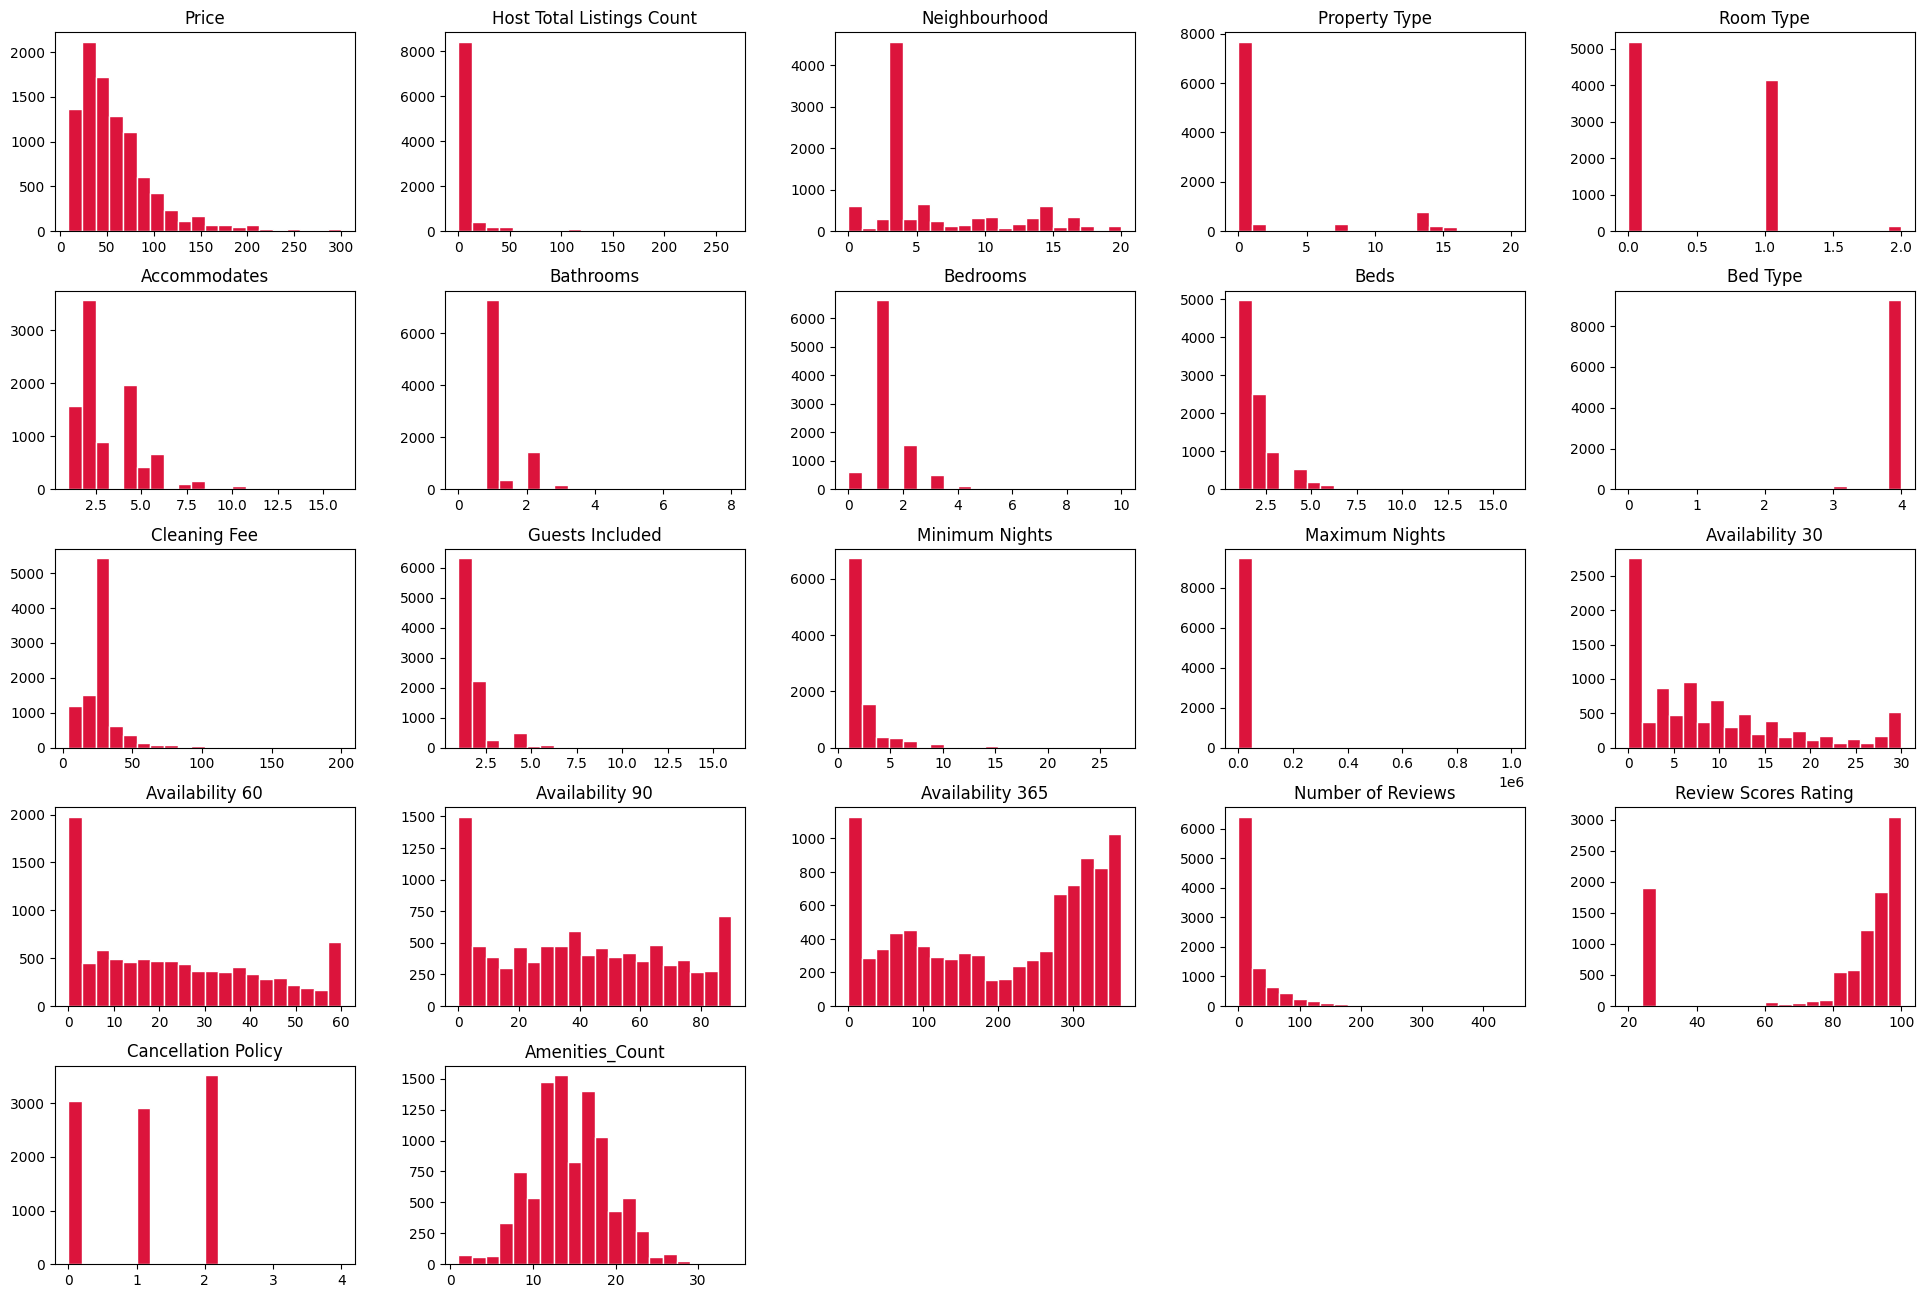

In [ ]:
df_train.hist(bins=20, figsize=(24,16), edgecolor = "white", color='crimson', grid=False)
plt.show()

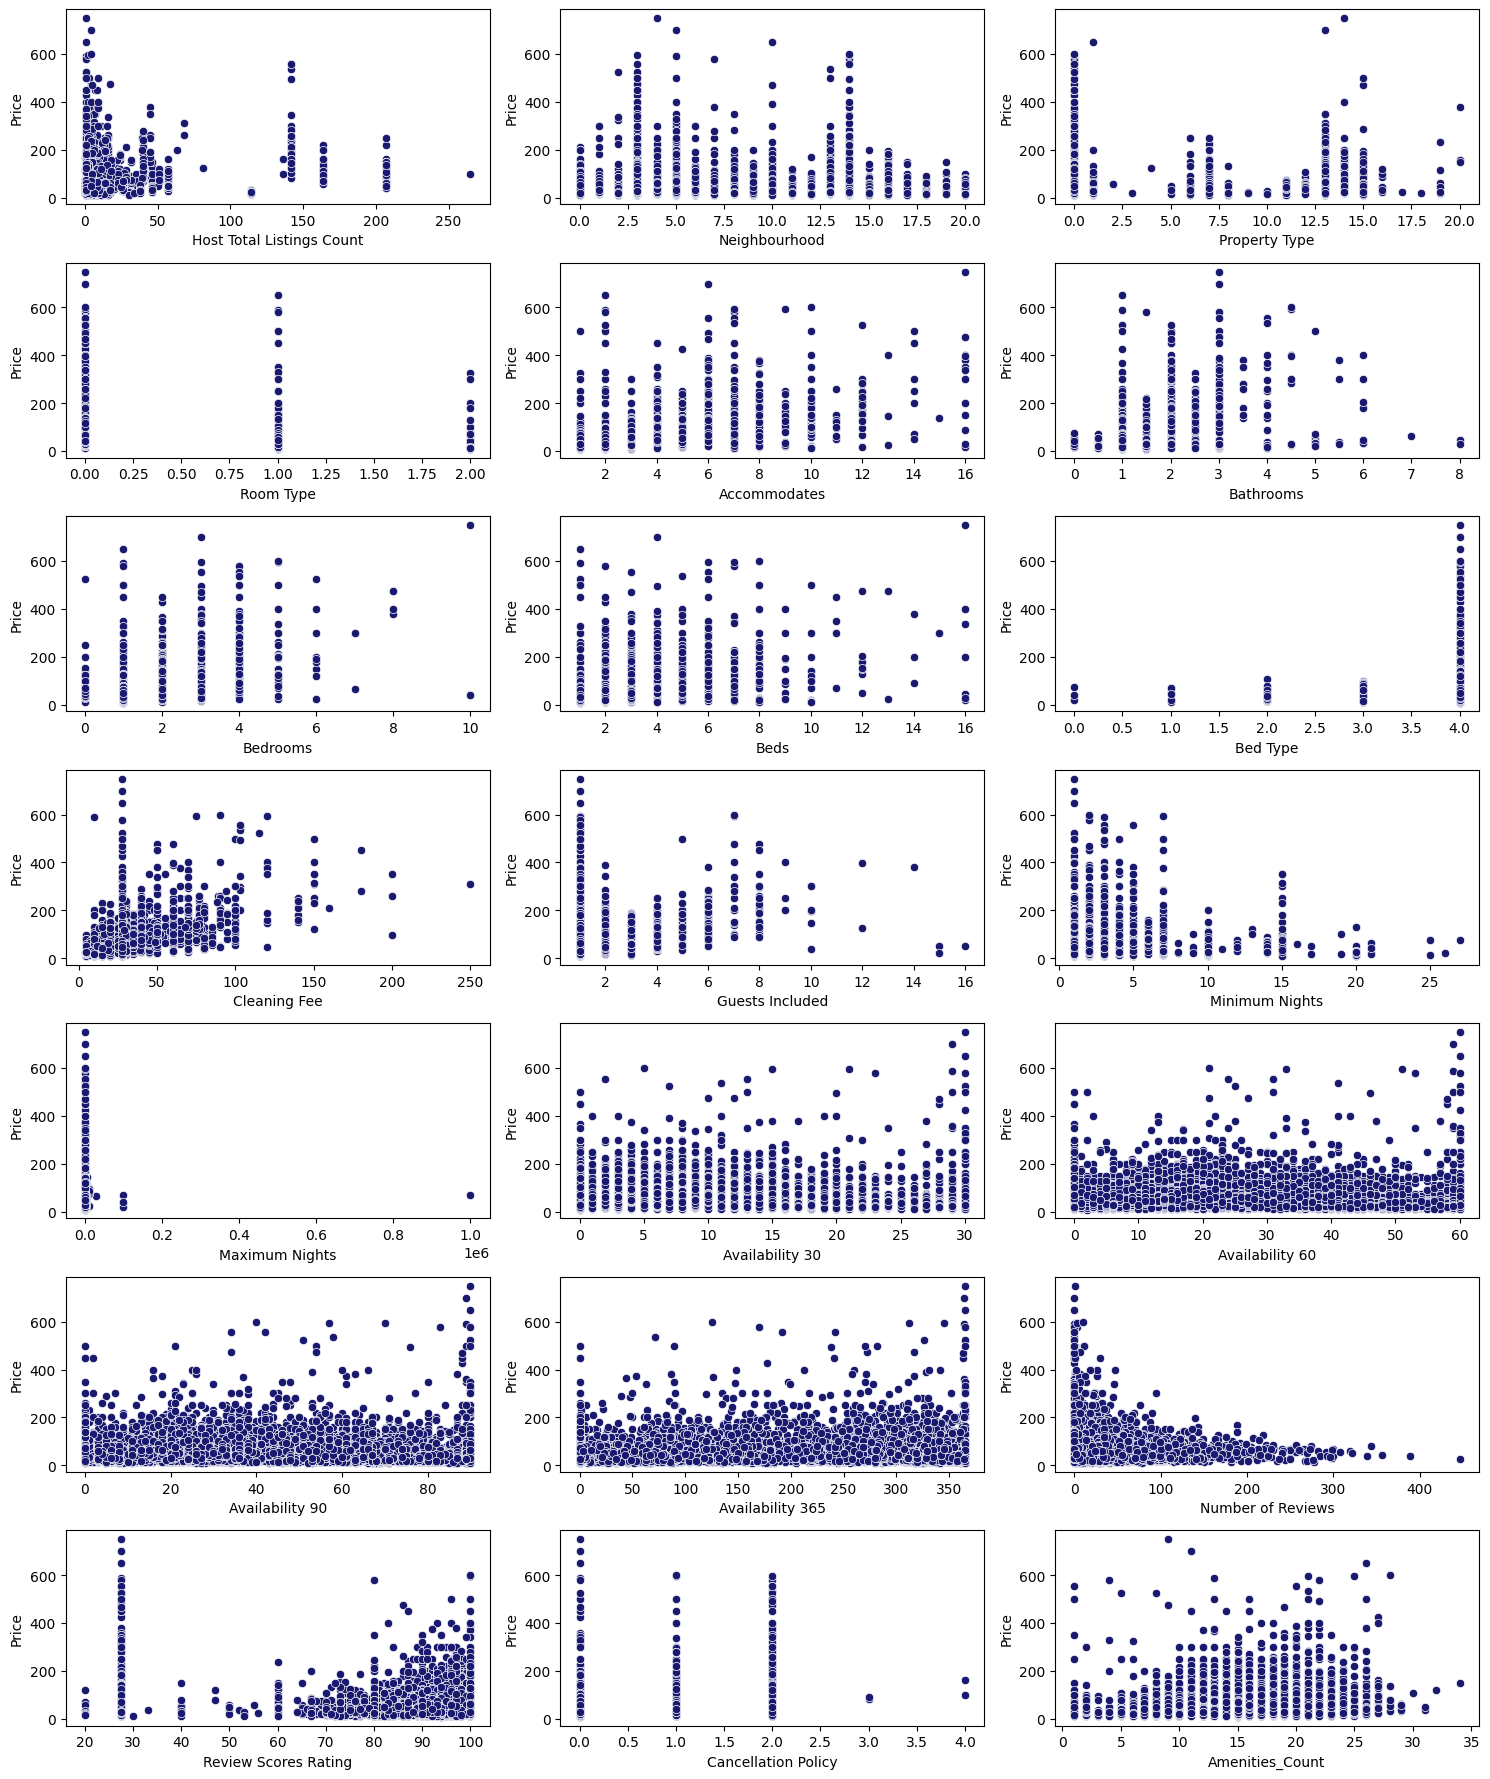

In [ ]:
plt.figure(figsize=(15, 20))

variables = ['Host Total Listings Count', 'Neighbourhood', 'Property Type', 'Room Type',
             'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Cleaning Fee',
             'Guests Included', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
             'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews',
             'Review Scores Rating', 'Cancellation Policy', 'Amenities_Count']

for i, var in enumerate(variables, start=1):
    plt.subplot(len(variables)//3 + 1, 3, i)
    sns.scatterplot(data=df_train, x=var, y='Price', color='midnightblue')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.grid(False)
    plt.tight_layout()

plt.show()

Matriz de correlación

<ipython-input-252-3344d6719080>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(df_train.drop(["Price"], axis=1).corr())


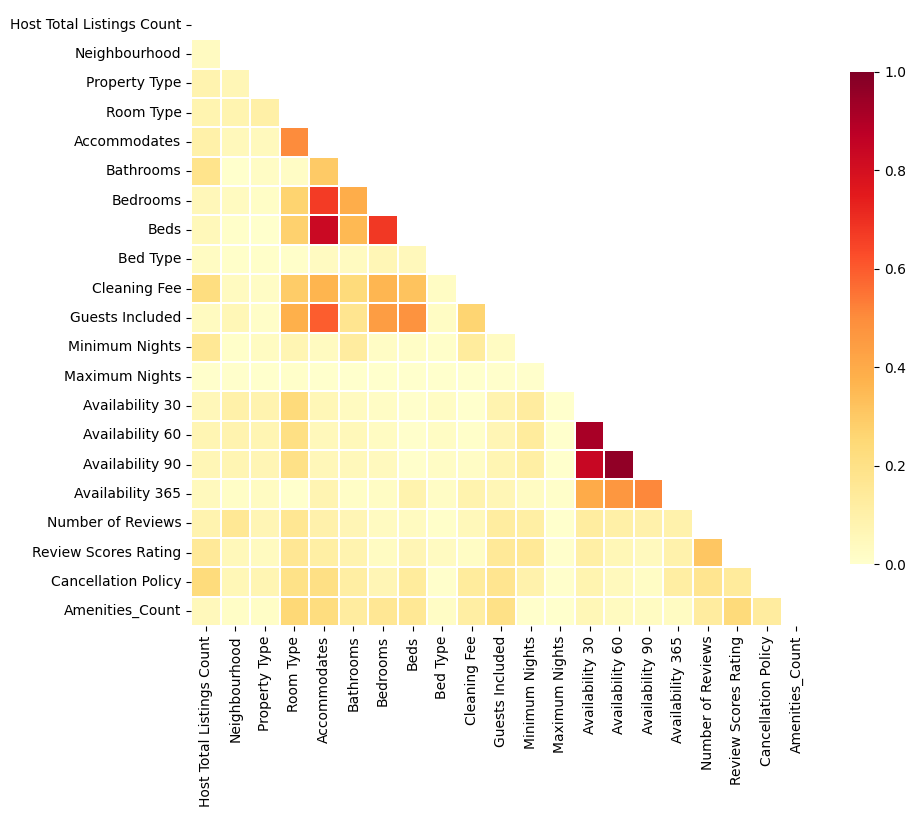

In [ ]:
import numpy as np
corr = np.abs(df_train.drop(["Price"], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlOrRd", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
corr

,Host Total Listings Count,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Cleaning Fee,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Amenities_Count
Host Total Listings Count,1.000000,0.032705,0.085622,0.081538,0.099158,0.186168,0.055613,0.052891,0.028262,0.220251,...,0.159054,0.004589,0.057966,0.070367,0.064899,0.043727,0.082894,0.149459,0.232288,0.047027
Neighbourhood,0.032705,1.000000,0.063050,0.078696,0.047853,0.002389,0.038216,0.008726,0.010118,0.037446,...,0.008724,0.004671,0.100213,0.082938,0.070912,0.017609,0.158480,0.051302,0.062072,0.018070
Property Type,0.085622,0.063050,1.000000,0.107695,0.046705,0.022834,0.016524,0.003369,0.009959,0.019624,...,0.029407,0.000861,0.084117,0.073367,0.067490,0.028894,0.070254,0.038204,0.073569,0.018848
Room Type,0.081538,0.078696,0.107695,1.000000,0.502010,0.022874,0.268828,0.274237,0.011355,0.291276,...,0.070732,0.009411,0.237399,0.210920,0.201155,0.002560,0.167802,0.162978,0.198436,0.249754
Accommodates,0.099158,0.047853,0.046705,0.502010,1.000000,0.299036,0.671346,0.828412,0.033440,0.364542,...,0.038905,0.001778,0.061202,0.049863,0.057498,0.077716,0.097193,0.115954,0.205170,0.223192
Bathrooms,0.186168,0.002389,0.022834,0.022874,0.299036,1.000000,0.394246,0.354336,0.038589,0.236103,...,0.129204,0.003544,0.036468,0.051674,0.050234,0.017162,0.069789,0.085002,0.120008,0.131165
Bedrooms,0.055613,0.038216,0.016524,0.268828,0.671346,0.394246,1.000000,0.677080,0.062510,0.361550,...,0.023178,0.003003,0.021350,0.028123,0.039080,0.024666,0.034642,0.028535,0.066452,0.162290
Beds,0.052891,0.008726,0.003369,0.274237,0.828412,0.354336,0.677080,1.000000,0.050620,0.322461,...,0.015928,0.002880,0.005659,0.006804,0.007203,0.086374,0.038567,0.069669,0.134717,0.159833
Bed Type,0.028262,0.010118,0.009959,0.011355,0.033440,0.038589,0.062510,0.050620,1.000000,0.024974,...,0.008116,0.003895,0.024248,0.024106,0.021918,0.023139,0.008811,0.031482,0.004403,0.019544
Cleaning Fee,0.220251,0.037446,0.019624,0.291276,0.364542,0.236103,0.361550,0.322461,0.024974,1.000000,...,0.134092,0.002392,0.000481,0.009999,0.020874,0.087064,0.053285,0.025564,0.132932,0.118810


Se revisan los outliers en 'Price'

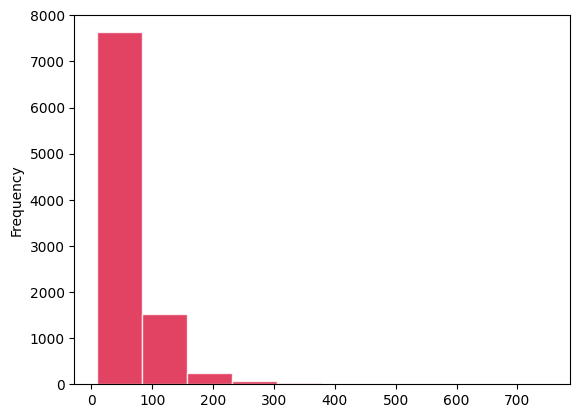

In [ ]:
df_train["Price"].plot.hist(alpha = 0.8, edgecolor = "white", color='crimson')
plt.show()

In [ ]:
len(df_train[df_train['Price'] > 300])

60

Al ser tan pocos se eliminan.

In [ ]:
df_train.drop(df_train[df_train['Price']>300].index, inplace = True)
df_train.shape

(9479, 23)

## Descarga de imágenes

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
images, idxs = download_images(df_train['Thumbnail Url'], max_imgs=3000)
images_train = images.astype("float32") / 255.
images_train.shape

100%|██████████| 3000/3000 [14:04<00:00,  3.55it/s]


(2317, 224, 224, 3)

In [ ]:
filtered_data = df_train.iloc[idxs]
filtered_data

,Price,Thumbnail Url,Host Total Listings Count,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Amenities_Count
7216,75.0,https://a0.muscache.com/im/pictures/50627152/d...,9.0,3.0,13.0,0.0,4.0,1.0,2.0,2.0,...,2.0,30.0,1.0,1.0,1.0,99.0,45.0,93.000000,0.0,10.0
8180,100.0,https://a0.muscache.com/im/pictures/bdadeaa7-7...,39.0,4.0,0.0,0.0,8.0,2.0,3.0,4.0,...,2.0,1125.0,16.0,42.0,61.0,336.0,1.0,100.000000,1.0,19.0
7880,65.0,https://a0.muscache.com/im/pictures/c0d23e55-6...,1.0,3.0,0.0,0.0,4.0,1.0,1.0,2.0,...,2.0,1125.0,13.0,43.0,73.0,163.0,0.0,27.478958,0.0,14.0
8213,60.0,https://a0.muscache.com/im/pictures/985719bf-8...,2.0,10.0,0.0,0.0,3.0,1.0,2.0,2.0,...,1.0,1125.0,0.0,0.0,0.0,0.0,1.0,60.000000,0.0,9.0
2836,22.0,https://a0.muscache.com/im/pictures/014df236-7...,5.0,5.0,0.0,1.0,2.0,1.0,1.0,2.0,...,1.0,1125.0,7.0,14.0,31.0,304.0,59.0,85.000000,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,50.0,https://a0.muscache.com/im/pictures/81694451/6...,1.0,3.0,0.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1125.0,7.0,37.0,67.0,342.0,4.0,90.000000,0.0,9.0
9390,19.0,https://a0.muscache.com/im/pictures/66668915/4...,34.0,14.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,28.0,3.0,33.0,63.0,338.0,26.0,84.000000,2.0,7.0
10650,25.0,https://a0.muscache.com/im/pictures/763a9896-f...,1.0,14.0,0.0,1.0,2.0,1.0,1.0,1.0,...,1.0,10.0,10.0,37.0,67.0,157.0,1.0,100.000000,1.0,12.0
953,26.0,https://a0.muscache.com/im/pictures/03c1febe-d...,1.0,12.0,0.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1125.0,0.0,8.0,38.0,129.0,1.0,100.000000,1.0,20.0


In [ ]:
numpy.save('images_train.npy', images)
filtered_data.to_csv('data_train.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp images_train.npy /content/drive/MyDrive/images_train.npy
!cp data_train.csv /content/drive/MyDrive/data_train.csv

!ls -lah images_train* data_train*  # Comprobación


-rw-r--r-- 1 root root 450K Feb 28 17:50 data_train.csv
-rw-r--r-- 1 root root 333M Feb 28 17:50 images_train.npy


In [ ]:
data_train = pandas.read_csv("/content/drive/MyDrive/data_train.csv", sep=';')
images_train = numpy.load("/content/drive/MyDrive/images_train.npy")
data_train.shape, images_train.shape

((2317, 23), (2317, 224, 224, 3))

 # Pipeline

In [ ]:
def pipeline(df):
  df = df.drop(columns=['Square Feet', 'Security Deposit'])

  cleaning_fee_mean = df['Cleaning Fee'].mean()
  df['Cleaning Fee'].fillna(cleaning_fee_mean, inplace=True)

  Review_Scores_Rating_mean = df['Review Scores Rating'].mean()
  df['Review Scores Rating'].fillna(cleaning_fee_mean, inplace=True)

  df = df.dropna(subset=['Host Total Listings Count', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Cleaning Fee', 'Review Scores Rating'])
  df = df.rename(columns={'Neighbourhood Group Cleansed': 'Neighbourhood'})

  encoder = OrdinalEncoder()
  columns_to_encode = ['Neighbourhood', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']
  df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

  df['Amenities'] = df['Amenities'].fillna('')
  df['Amenities_Count'] = df['Amenities'].str.split(',').apply(len)
  df = df.drop(['Amenities'], axis=1)

  columnas = df.columns.tolist()
  columnas.insert(0, columnas.pop(columnas.index('Price')))
  df = df[columnas]

  df['Accommodates'] = df['Accommodates'].round().astype(float)
  df['Guests Included'] = df['Guests Included'].round().astype(float)
  df['Minimum Nights'] = df['Minimum Nights'].round().astype(float)
  df['Maximum Nights'] = df['Maximum Nights'].round().astype(float)
  df['Availability 30'] = df['Availability 30'].round().astype(float)
  df['Availability 60'] = df['Availability 60'].round().astype(float)
  df['Availability 90'] = df['Availability 90'].round().astype(float)
  df['Availability 365'] = df['Availability 365'].round().astype(float)
  df['Number of Reviews'] = df['Number of Reviews'].round().astype(float)
  df['Amenities_Count'] = df['Amenities_Count'].round().astype(float)

  df.drop(df[df['Price']>300].index, inplace = True)

  return df

In [ ]:
df_test.to_csv('./df_test.csv', sep=';', decimal='.', index=False)
df_validation.to_csv('./df_validation.csv', sep=';', decimal='.', index=False)

from google.colab import drive
drive.mount('/content/drive')

!cp df_test.csv /content/drive/MyDrive/df_test.csv
!cp df_validation.csv /content/drive/MyDrive/df_validation.csv
!ls -lah df_test* df_validation*  # Comprobación

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-rw-r--r-- 1 root root 1.1M Feb 28 17:50 df_test.csv
-rw-r--r-- 1 root root 420K Feb 28 17:50 df_validation.csv


Aplicación de la función a los datos de test y descarga de imágenes.

In [ ]:
df_test = pandas.read_csv("/content/drive/MyDrive/df_test.csv", sep=';')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Thumbnail Url                 2696 non-null   object 
 1   Host Total Listings Count     2696 non-null   float64
 2   Neighbourhood Group Cleansed  2696 non-null   object 
 3   Property Type                 2696 non-null   object 
 4   Room Type                     2696 non-null   object 
 5   Accommodates                  2696 non-null   int64  
 6   Bathrooms                     2685 non-null   float64
 7   Bedrooms                      2693 non-null   float64
 8   Beds                          2689 non-null   float64
 9   Bed Type                      2696 non-null   object 
 10  Amenities                     2660 non-null   object 
 11  Square Feet                   93 non-null     float64
 12  Price                         2696 non-null   float64
 13  Sec

In [ ]:
df_test = pipeline(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2695
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      2632 non-null   float64
 1   Thumbnail Url              2632 non-null   object 
 2   Host Total Listings Count  2632 non-null   float64
 3   Neighbourhood              2632 non-null   float64
 4   Property Type              2632 non-null   float64
 5   Room Type                  2632 non-null   float64
 6   Accommodates               2632 non-null   float64
 7   Bathrooms                  2632 non-null   float64
 8   Bedrooms                   2632 non-null   float64
 9   Beds                       2632 non-null   float64
 10  Bed Type                   2632 non-null   float64
 11  Cleaning Fee               2632 non-null   float64
 12  Guests Included            2632 non-null   float64
 13  Minimum Nights             2632 non-null   float

In [ ]:
df_test.shape

(2632, 23)

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
images, idxs = download_images(df_test['Thumbnail Url'], max_imgs=2000)
images_test = images.astype("float32") / 255.
images_test.shape

100%|██████████| 2000/2000 [08:20<00:00,  4.00it/s]


(1531, 224, 224, 3)

In [ ]:
filtered_data = df_test.iloc[idxs]
filtered_data

,Price,Thumbnail Url,Host Total Listings Count,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Amenities_Count
0,200.0,https://a0.muscache.com/im/pictures/9aa530e0-d...,28.0,14.0,0.0,0.0,5.0,2.5,2.0,4.0,...,5.0,180.0,10.0,40.0,70.0,70.0,0.0,26.919192,2.0,21.0
1,25.0,https://a0.muscache.com/im/pictures/5c87c7de-0...,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,10.0,30.0,60.0,90.0,365.0,3.0,80.000000,0.0,15.0
2,98.0,https://a0.muscache.com/im/pictures/dd92d2d9-7...,1.0,14.0,0.0,0.0,3.0,1.0,0.0,1.0,...,2.0,91.0,2.0,14.0,32.0,123.0,16.0,96.000000,2.0,24.0
5,30.0,https://a0.muscache.com/im/pictures/1627c5d5-1...,1.0,19.0,8.0,1.0,2.0,1.0,1.0,2.0,...,1.0,3.0,28.0,58.0,88.0,363.0,1.0,26.919192,0.0,20.0
6,210.0,https://a0.muscache.com/im/pictures/95cbd007-6...,2.0,13.0,0.0,0.0,4.0,2.5,2.0,2.0,...,2.0,30.0,7.0,27.0,30.0,118.0,78.0,98.000000,2.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,35.0,https://a0.muscache.com/im/pictures/365063/592...,1.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,...,1.0,30.0,0.0,5.0,35.0,310.0,7.0,100.000000,0.0,19.0
2044,24.0,https://a0.muscache.com/im/pictures/0ec17c2d-a...,5.0,3.0,7.0,1.0,2.0,1.0,1.0,1.0,...,2.0,3.0,15.0,15.0,15.0,234.0,2.0,100.000000,2.0,8.0
2045,35.0,https://a0.muscache.com/im/pictures/39279776/f...,7.0,0.0,12.0,1.0,2.0,1.0,1.0,2.0,...,1.0,14.0,0.0,1.0,6.0,215.0,199.0,94.000000,0.0,13.0
2046,120.0,https://a0.muscache.com/im/pictures/ea3c4605-d...,1.0,13.0,0.0,0.0,6.0,2.0,2.0,4.0,...,3.0,1125.0,5.0,25.0,50.0,196.0,27.0,87.000000,2.0,24.0


In [ ]:
numpy.save('images_test.npy', images_test)
filtered_data.to_csv('data_test.csv', sep=';', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp images_test.npy /content/drive/MyDrive/images_test.npy
!cp data_test.csv /content/drive/MyDrive/data_test.csv

!ls -lah images_test* data_test*  # Comprobación

-rw-r--r-- 1 root root 297K Feb 28 18:00 data_test.csv
-rw-r--r-- 1 root root 880M Feb 28 18:00 images_test.npy


In [ ]:
data_test = pandas.read_csv("/content/drive/MyDrive/data_test.csv", sep=';')
images_test = numpy.load("/content/drive/MyDrive/images_test.npy")
data_test.shape, images_test.shape

((1531, 23), (1531, 224, 224, 3))

Aplicación de la función a los datos de validation y descarga de imágenes.

In [ ]:
df_validation = pandas.read_csv("/content/drive/MyDrive/df_validation.csv", sep=';')
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Thumbnail Url                 1079 non-null   object 
 1   Host Total Listings Count     1079 non-null   float64
 2   Neighbourhood Group Cleansed  1079 non-null   object 
 3   Property Type                 1079 non-null   object 
 4   Room Type                     1079 non-null   object 
 5   Accommodates                  1079 non-null   int64  
 6   Bathrooms                     1075 non-null   float64
 7   Bedrooms                      1079 non-null   float64
 8   Beds                          1076 non-null   float64
 9   Bed Type                      1079 non-null   object 
 10  Amenities                     1065 non-null   object 
 11  Square Feet                   41 non-null     float64
 12  Price                         1079 non-null   float64
 13  Sec

In [ ]:
df_validation = pipeline(df_validation)
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1078
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      1058 non-null   float64
 1   Thumbnail Url              1058 non-null   object 
 2   Host Total Listings Count  1058 non-null   float64
 3   Neighbourhood              1058 non-null   float64
 4   Property Type              1058 non-null   float64
 5   Room Type                  1058 non-null   float64
 6   Accommodates               1058 non-null   float64
 7   Bathrooms                  1058 non-null   float64
 8   Bedrooms                   1058 non-null   float64
 9   Beds                       1058 non-null   float64
 10  Bed Type                   1058 non-null   float64
 11  Cleaning Fee               1058 non-null   float64
 12  Guests Included            1058 non-null   float64
 13  Minimum Nights             1058 non-null   float

In [ ]:
df_validation.shape

(1058, 23)

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
images, idxs = download_images(df_validation['Thumbnail Url'], max_imgs=1000)
images_validation = images.astype("float32") / 255.
images_validation.shape

100%|██████████| 1000/1000 [04:03<00:00,  4.10it/s]


(775, 224, 224, 3)

In [ ]:
filtered_data = df_validation.iloc[idxs]
filtered_data

,Price,Thumbnail Url,Host Total Listings Count,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Amenities_Count
0,200.0,https://a0.muscache.com/im/pictures/9aa530e0-d...,28.0,14.0,0.0,0.0,5.0,2.5,2.0,4.0,...,5.0,180.0,10.0,40.0,70.0,70.0,0.0,26.260097,2.0,21.0
1,25.0,https://a0.muscache.com/im/pictures/5c87c7de-0...,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,10.0,30.0,60.0,90.0,365.0,3.0,80.000000,0.0,15.0
2,98.0,https://a0.muscache.com/im/pictures/dd92d2d9-7...,1.0,14.0,0.0,0.0,3.0,1.0,0.0,1.0,...,2.0,91.0,2.0,14.0,32.0,123.0,16.0,96.000000,2.0,24.0
5,30.0,https://a0.muscache.com/im/pictures/1627c5d5-1...,1.0,19.0,6.0,1.0,2.0,1.0,1.0,2.0,...,1.0,3.0,28.0,58.0,88.0,363.0,1.0,26.260097,0.0,20.0
6,210.0,https://a0.muscache.com/im/pictures/95cbd007-6...,2.0,13.0,0.0,0.0,4.0,2.5,2.0,2.0,...,2.0,30.0,7.0,27.0,30.0,118.0,78.0,98.000000,2.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,45.0,https://a0.muscache.com/im/pictures/0599abee-7...,1.0,3.0,0.0,1.0,2.0,1.0,1.0,1.0,...,1.0,15.0,20.0,50.0,80.0,80.0,6.0,90.000000,1.0,22.0
1015,45.0,https://a0.muscache.com/im/pictures/c5448c64-9...,1.0,13.0,0.0,1.0,2.0,1.0,1.0,1.0,...,2.0,90.0,0.0,17.0,42.0,317.0,31.0,98.000000,1.0,21.0
1016,85.0,https://a0.muscache.com/im/pictures/44239584/c...,3.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,...,3.0,1125.0,12.0,32.0,45.0,320.0,90.0,95.000000,2.0,16.0
1017,69.0,https://a0.muscache.com/im/pictures/d5944ba5-b...,3.0,14.0,0.0,0.0,4.0,1.0,1.0,2.0,...,2.0,1125.0,11.0,15.0,43.0,318.0,6.0,97.000000,2.0,20.0


In [ ]:
numpy.save('images_validation.npy', images_validation)
filtered_data.to_csv('data_validation.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp images_validation.npy /content/drive/MyDrive/images_validation.npy
!cp data_validation.csv /content/drive/MyDrive/data_validation.csv

!ls -lah images_validation* data_validation*  # Comprobación

-rw-r--r-- 1 root root 151K Feb 28 18:07 data_validation.csv
-rw-r--r-- 1 root root 446M Feb 28 18:07 images_validation.npy


In [ ]:
data_validation = pandas.read_csv("/content/drive/MyDrive/data_validation.csv", sep=';')
images_validation = numpy.load("/content/drive/MyDrive/images_validation.npy")
data_validation.shape, images_validation.shape

((775, 23), (775, 224, 224, 3))

Se elimina la columna 'Thumbnail Url' de los datasets ya que están descargadas las imágenes.

In [ ]:
x_train_data = data_train.drop(['Thumbnail Url'], axis=1)
x_test_data = data_test.drop(['Thumbnail Url'], axis=1)
x_validation_data = data_validation.drop(['Thumbnail Url'], axis=1)
x_train_data.shape, x_test_data.shape, x_validation_data.shape

((2317, 22), (1531, 22), (775, 22))

# Se guarda la variable objetivo 'Precio' para el modelo de regresión, se escala y se crea las clases para el modelo de clasificación.

Datos train:

<Axes: >

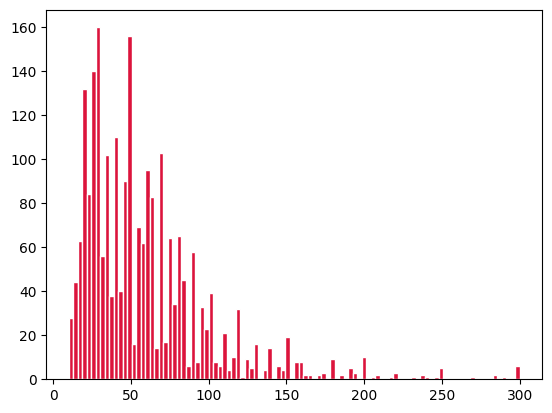

In [ ]:
x_train_data['Price'].hist(bins=100, edgecolor="white", color='crimson', grid=False)

In [ ]:
x_train_data['Price'].describe()

count    2317.000000
mean       59.086750
std        41.360716
min        10.000000
25%        30.000000
50%        50.000000
75%        75.000000
max       300.000000
Name: Price, dtype: float64

Regresión

In [ ]:
y_reg_train = x_train_data['Price']
y_reg_train.shape

(2317,)

In [ ]:
max_price = y_reg_train.max()
y_reg_train = y_reg_train / max_price
y_reg_train.shape

(2317,)

Casificación

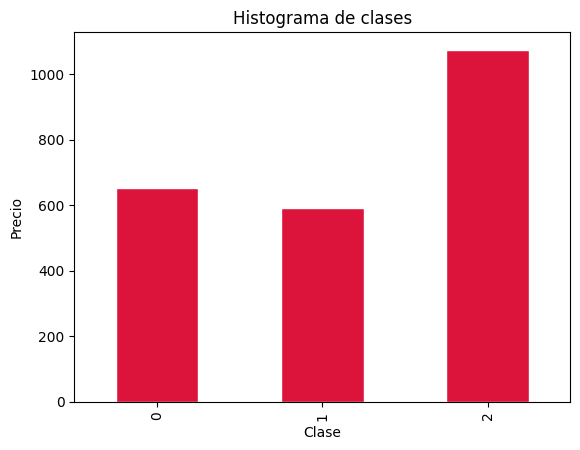

In [ ]:
import pandas as pd
y_class_train = pd.cut(x_train_data['Price'], bins=[-float('inf'), 30, 50, float('inf')], labels=[0, 1, 2])

y_class_train = pd.get_dummies(y_class_train)

y_class_train.sum(axis=0).plot(kind='bar', color='crimson', edgecolor='white', grid=False)
plt.xlabel('Clase')
plt.ylabel('Precio')
plt.title('Histograma de clases')
plt.show()

In [ ]:
y_class_train.shape

(2317, 3)

Se elimina la variable precio del dataframe ya que se tienen aparte.

In [ ]:
x_train_data.drop(['Price'], axis=1, inplace=True)
x_train_data.shape

(2317, 21)

Datos test:

<Axes: >

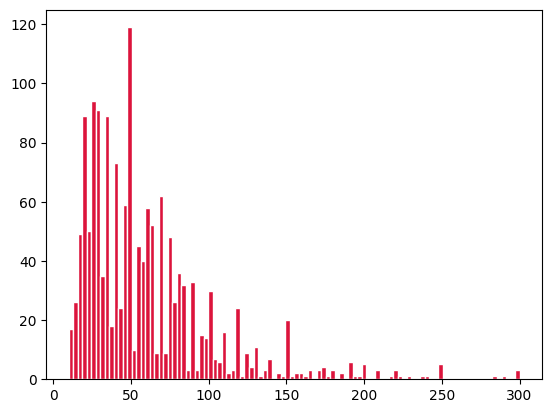

In [ ]:
x_test_data['Price'].hist(bins=100, edgecolor="white", color='crimson', grid=False)

In [ ]:
x_test_data['Price'].describe()

count    1531.000000
mean       59.606793
std        42.144455
min        10.000000
25%        30.000000
50%        50.000000
75%        75.000000
max       300.000000
Name: Price, dtype: float64

Regresión

In [ ]:
y_reg_test = x_test_data['Price']
y_reg_test.shape

(1531,)

In [ ]:
max_price = y_reg_test.max()
y_reg_test = y_reg_test / max_price
y_reg_test.shape

(1531,)

Clasificación

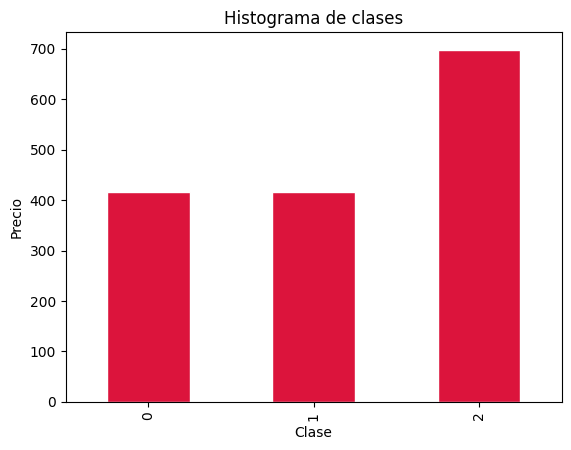

In [ ]:
y_class_test = pd.cut(x_test_data['Price'], bins=[-float('inf'), 30, 50, float('inf')], labels=[0, 1, 2])

y_class_test = pd.get_dummies(y_class_test)

y_class_test.sum(axis=0).plot(kind='bar', color='crimson', edgecolor='white', grid=False)
plt.xlabel('Clase')
plt.ylabel('Precio')
plt.title('Histograma de clases')
plt.show()

In [ ]:
y_class_test.shape

(1531, 3)

In [ ]:
x_test_data.drop(['Price'], axis=1, inplace=True)
x_test_data.shape

(1531, 21)

Datos validation:

<Axes: >

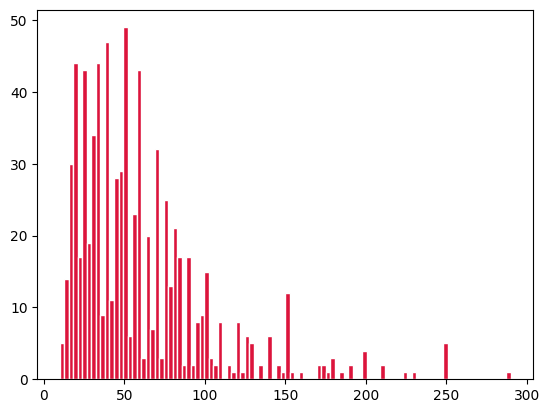

In [ ]:
x_validation_data['Price'].hist(bins=100, edgecolor="white", color='crimson', grid=False)

In [ ]:
x_validation_data['Price'].describe()

count    775.000000
mean      60.157419
std       41.681405
min       10.000000
25%       30.000000
50%       50.000000
75%       75.000000
max      290.000000
Name: Price, dtype: float64

Regresion

In [ ]:
y_reg_validation = x_validation_data['Price']
y_reg_validation.shape

(775,)

In [ ]:
max_price = y_reg_validation.max()
y_reg_validation = y_reg_validation / max_price
y_reg_validation.shape

(775,)

Clasificación

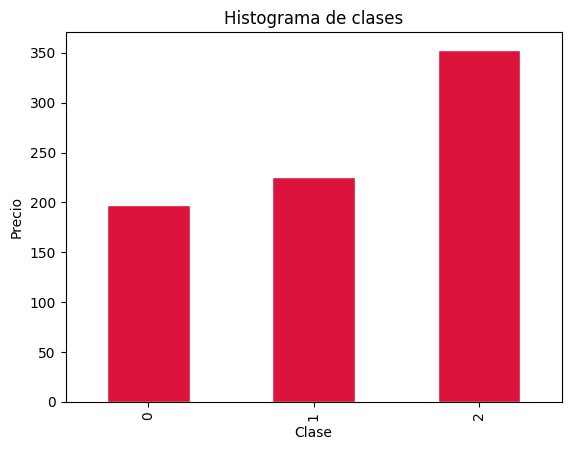

In [ ]:
y_class_validation = pd.cut(x_validation_data['Price'], bins=[-float('inf'), 30, 50, float('inf')], labels=[0, 1, 2])

y_class_validation = pd.get_dummies(y_class_validation)

y_class_validation.sum(axis=0).plot(kind='bar', color='crimson', edgecolor='white', grid=False)
plt.xlabel('Clase')
plt.ylabel('Precio')
plt.title('Histograma de clases')
plt.show()

In [ ]:
y_class_validation.shape

(775, 3)

In [ ]:
x_validation_data.drop(['Price'], axis=1, inplace=True)
x_validation_data.shape

(775, 21)

Se guardan

In [ ]:
x_train_data.to_csv('x_train_data.csv', sep=';', index=False)
x_test_data.to_csv('x_test_data.csv', sep=';', index=False)
x_validation_data.to_csv('x_validation_data.csv', sep=';', index=False)

y_reg_train.to_csv('y_reg_train.csv', sep=';', index=False)
y_reg_test.to_csv('y_reg_test.csv', sep=';', index=False)
y_reg_validation.to_csv('y_reg_validation.csv', sep=';', index=False)

y_class_train.to_csv('y_class_train.csv', sep=';', index=False)
y_class_test.to_csv('y_class_test.csv', sep=';', index=False)
y_class_validation.to_csv('y_class_validation.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp x_train_data.csv /content/drive/MyDrive/x_train_data.csv
!cp x_test_data.csv /content/drive/MyDrive/x_test_data.csv
!cp x_validation_data.csv /content/drive/MyDrive/x_validation_data.csv

!cp y_reg_train.csv /content/drive/MyDrive/y_reg_train.csv
!cp y_reg_test.csv /content/drive/MyDrive/y_reg_test.csv
!cp y_reg_validation.csv /content/drive/MyDrive/y_reg_validation.csv

!cp y_class_train.csv /content/drive/MyDrive/y_class_train.csv
!cp y_class_test.csv /content/drive/MyDrive/y_class_test.csv
!cp y_class_validation.csv /content/drive/MyDrive/y_class_validation.csv

!ls -lah x_train_data* x_test_data* x_validation_data*
!ls -lah y_reg_train* y_reg_test* y_reg_validation*
!ls -lah y_class_train* y_class_test* y_class_validation*

-rw-r--r-- 1 root root 153K Feb 28 19:36 x_test_data.csv
-rw-r--r-- 1 root root 232K Feb 28 19:36 x_train_data.csv
-rw-r--r-- 1 root root  78K Feb 28 19:36 x_validation_data.csv
-rw-r--r-- 1 root root 23K Feb 28 19:36 y_reg_test.csv
-rw-r--r-- 1 root root 34K Feb 28 19:36 y_reg_train.csv
-rw-r--r-- 1 root root 15K Feb 28 19:36 y_reg_validation.csv
-rw-r--r-- 1 root root 9.0K Feb 28 19:36 y_class_test.csv
-rw-r--r-- 1 root root  14K Feb 28 19:36 y_class_train.csv
-rw-r--r-- 1 root root 4.6K Feb 28 19:36 y_class_validation.csv


In [ ]:
x_train_data = pandas.read_csv("/content/drive/MyDrive/x_train_data.csv", sep=';')
x_test_data = pandas.read_csv("/content/drive/MyDrive/x_test_data.csv", sep=';')
x_validation_data = pandas.read_csv("/content/drive/MyDrive/x_validation_data.csv", sep=';')

x_train_data.shape, x_test_data.shape, x_validation_data.shape

((2317, 21), (1531, 21), (775, 21))

In [ ]:
y_reg_train = pandas.read_csv("/content/drive/MyDrive/y_reg_train.csv", sep=';')
y_reg_test = pandas.read_csv("/content/drive/MyDrive/y_reg_test.csv", sep=';')
y_reg_validation = pandas.read_csv("/content/drive/MyDrive/y_reg_validation.csv", sep=';')

y_reg_train.shape, y_reg_test.shape, y_reg_validation.shape

((2317, 1), (1531, 1), (775, 1))

In [ ]:
y_class_train = pandas.read_csv("/content/drive/MyDrive/y_class_train.csv", sep=';')
y_class_test = pandas.read_csv("/content/drive/MyDrive/y_class_test.csv", sep=';')
y_class_validation = pandas.read_csv("/content/drive/MyDrive/y_class_validation.csv", sep=';')

y_class_train.shape, y_class_test.shape, y_class_validation.shape

((2317, 3), (1531, 3), (775, 3))